In [18]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage import filters
from skimage import restoration
import pandas as pd

In [19]:
header_list = ['eta', 'x', 'y', 'eps', 'ut', 'ux', 'uy', 'T00', 'T0x', 'T0y', 'T0eta'] 
nx = ny = 200 # the number of pixels (gridpoints) in x and y
dx = dy = 0.17 # the size of each pixel in fm = 10^{-15} m
n_profiles = 3970 # the number of profiles

# the factor by which we coarse-grain.
# profiles should probably only be coarse-grained for testing/debugging purposes
n_coarse = 1  
nx_red = nx / n_coarse
ny_red = ny / n_coarse

def load_ipglasma_profile(i):
    """A function to read in a single ipglasma event profile from disk"""
    df = pd.read_csv('training_profiles/PbPb0-10/epsilon-u-Hydro'+str(i)+'.dat', header=None, 
                 sep=' ', skiprows=1, names=header_list)
    eps = df['eps'].values.reshape(nx, ny)[::n_coarse, ::n_coarse]
    return eps

/usr/local/anaconda5/lib/python3.6/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  import sys


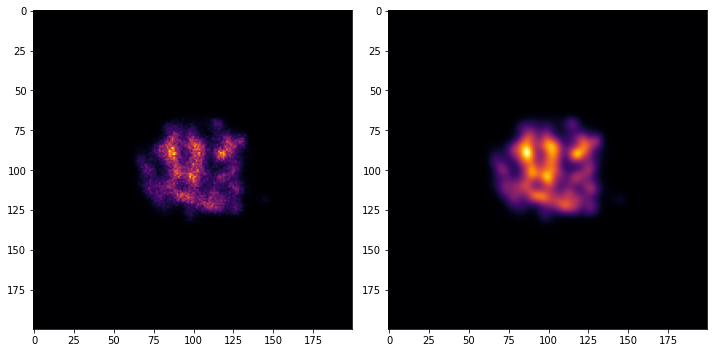

In [21]:
eps = load_ipglasma_profile(1) # the loaded profile
smooth_eps = filters.gaussian(eps, sigma=2)

fig, axes = plt.subplots(1,2, figsize=(10,5))
axes[0].imshow(eps, cmap='inferno')
axes[1].imshow(smooth_eps, cmap='inferno')
plt.tight_layout(True)
plt.show()